In [1]:
import scipy.io as scio
import math
import numpy as np
import matplotlib.pyplot as plt

dataMat = scio.loadmat('./dataset/1_data.mat')
x = dataMat['x']
t = dataMat['t']

In [45]:
def phi(x, m):
    X = []
    for i in range(m):
        # X += [sigmoid_basis(x,i, m)]
        X.append(sigmoid_basis(x,i, m))
    return np.array(X).reshape(-1, m)

def sigmoid_basis(x, j, m, sigma=0.1):
    muj = (2*j)/ m
    a = (x - muj)/ sigma
    return 1/ (1 + np.exp(-a))

def predict(w, x):
    return w.dot(x.T)

M = 3

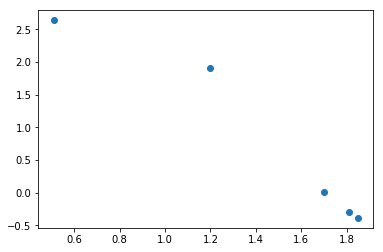

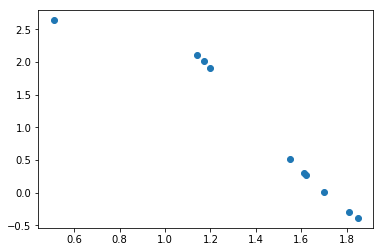

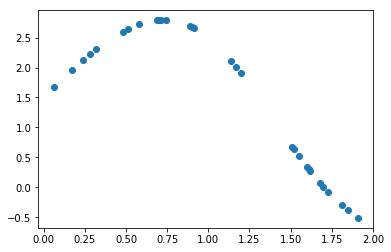

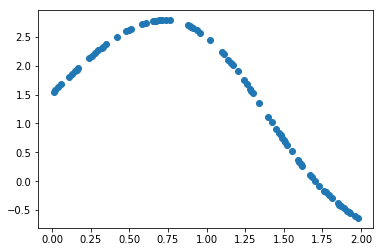

In [28]:
for n in [5,10,30,80]: #分別用不同的資料量測試
    plt.figure()
    plt.plot(x[:n],t[:n],'o') #劃上資料點

    PHI = phi(x[0], M)
    target = t[:n]
    for i in range(1,n):
        PHI = np.vstack((PHI, phi(x[i], M)))

(5, 100)
(5, 100)
(5, 100)
(5, 100)


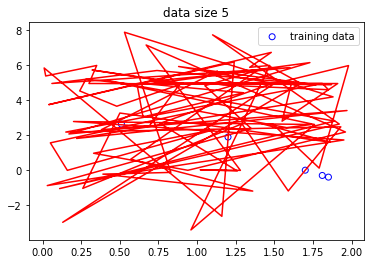

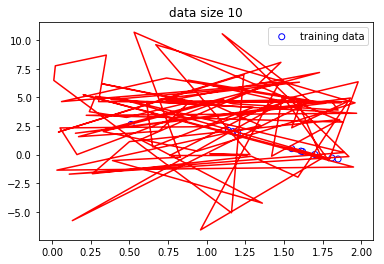

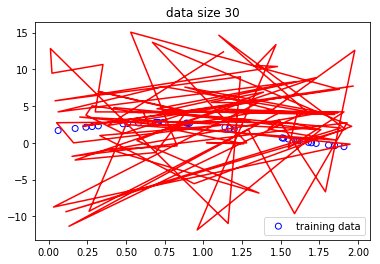

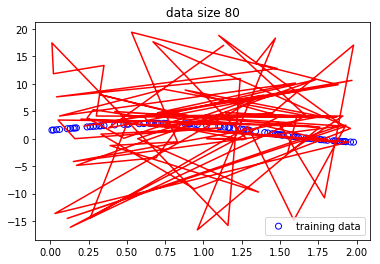

In [52]:
s0_inv = (10**-6) * np.identity(M) #S0
m0 = 0
beta = 1
MNs = []
SNs = []
data_len = [5,10,30,80]

# 大PHI矩陣(裡面有許多小phi)
PHI =  phi(x[0], M)
sn_inv = s0_inv + beta*PHI.T.dot(PHI)
sn = np.linalg.inv(sn_inv)
mn = sn.dot(beta*np.dot(PHI.T, t[0]))
# todo: 每次多拿到一筆資料來更新M, S
for i in range(1, x.shape[0]):
    PHI = np.vstack((PHI, phi(x[i], M)))
    sn_inv = sn_inv + beta*PHI.T.dot(PHI) # 計算Sn，且beta = 1
    sn = np.linalg.inv(sn_inv)
    # print(sn.shape, PHI.shape, t[:i+1].shape)
    mn = sn.dot((sn_inv.dot(mn)+beta*PHI.T.dot(t[:i+1]).reshape(-1)))
    # 存特定data筆數的mean跟std
    if i in data_len:
        MNs.append(mn)
        SNs.append(sn)
        # plot data point
        plt.figure()
        plt.scatter(x[:i],t[:i], facecolor="none", edgecolor="b", label="training data")
        plt.legend()
        # sample five curve
        w_sampled = np.random.multivariate_normal(mn, sn, size=5)  # same as scipy multivariate_normal
        pred = predict(w_sampled, phi(x, M))
        # plot five curve that we just sampled
        plt.plot(x, pred[0], '-r')
        for j in range(5):
            plt.title('data size %d' % i)
            # plt.plot(x, pred[j], '-r')

In [36]:
print(np.dot(phi(x[0], M).T, t[0]).shape)

(3,)


In [19]:
b = phi(x[:3], 3)
# print(x[0])
print(b.shape)

(3, 3, 1)


In [ ]:
def gaussian_pdf(x, mean, sd):
    y = (1/(sd * math.sqrt(2*math.pi))) * (math.e ** ((x-mean)** 2)/2*sd**2)
    return y
